## Introduction

#### Dementia
~~

#### Alzheimer
~~

## 1. Data



**[Summary]**

1. The present MRI data set consists of a longitudinal collection of 150 subjects aged 60 to 96 years all acquired on the same scanner using identical sequences. 


2. Each subject was scanned on two or more visits, separated by at least 1 year for a total of 373 imaging sessions.


3.  Seventy-two of the subjects were characterized as nondemented throughout the study. 


4. Sixty-four of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with CDR 0.5


5. Another 14 subjects were characterized as nondemented at the time of their initial visit (CDR 0) and were subsequently characterized as demented at a later visit (CDR > 0). 


6. The subjects were all right-handed


7. Men (n = 62) & Women (n = 88)



**[Description]**

|Name|Description|
|---|---|
|ID|Identification|
|M/F|Gender|
|Hand|Handedness|
|Age|Age|
|EDUC|Years of education|
|SES|Socioeconomic Status|
|MMSE|Mini Mental State Examination|
|CDR|Clinical Dementia Rating|
|eTIV|Estimated Total Intracranial Volume|
|nWBV|Normalize Whole Brain Volume|
|ASF|Atlas Scaling Factor|

## 2. Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("/content/drive/MyDrive/Project/oasis_longitudinal.csv")
data.head()

Subject ID         MRI ID        Group  Visit  ...  CDR  eTIV   nWBV    ASF
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1  ...  0.0  1987  0.696  0.883
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2  ...  0.0  2004  0.681  0.876
2  OAS2_0002  OAS2_0002_MR1     Demented      1  ...  0.5  1678  0.736  1.046
3  OAS2_0002  OAS2_0002_MR2     Demented      2  ...  0.5  1738  0.713  1.010
4  OAS2_0002  OAS2_0002_MR3     Demented      3  ...  0.5  1698  0.701  1.034

[5 rows x 15 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
data.describe()

Visit     MR Delay         Age  ...         eTIV        nWBV         ASF
count  373.000000   373.000000  373.000000  ...   373.000000  373.000000  373.000000
mean     1.882038   595.104558   77.013405  ...  1488.128686    0.729568    1.195461
std      0.922843   635.485118    7.640957  ...   176.139286    0.037135    0.138092
min      1.000000     0.000000   60.000000  ...  1106.000000    0.644000    0.876000
25%      1.000000     0.000000   71.000000  ...  1357.000000    0.700000    1.099000
50%      2.000000   552.000000   77.000000  ...  1470.000000    0.729000    1.194000
75%      2.000000   873.000000   82.000000  ...  1597.000000    0.756000    1.293000
max      5.000000  2639.000000   98.000000  ...  2004.000000    0.837000    1.587000

[8 rows x 10 columns]

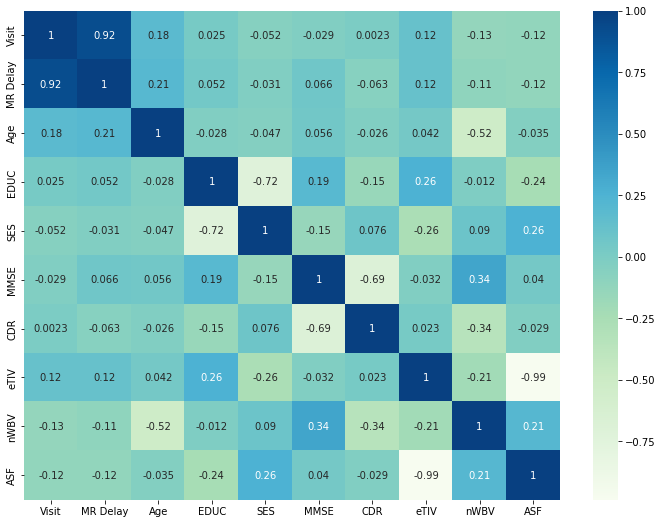

In [ ]:
corr = data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap = 'GnBu', xticklabels = corr.columns.values,
            yticklabels = corr.columns.values, annot=True);

In [ ]:
# Drop unnecessary columns
df = data.drop(['MRI ID','Visit','MR Delay','Hand'], axis=1)

In [ ]:
df['Group'] = df['Group'].replace(['Nondemented', 'Demented', 'Converted'], [0,1,2])

In [ ]:
df.head()

Subject ID  Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0  OAS2_0001      0   M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1  OAS2_0001      0   M   88    14  2.0  30.0  0.0  2004  0.681  0.876
2  OAS2_0002      1   M   75    12  NaN  23.0  0.5  1678  0.736  1.046
3  OAS2_0002      1   M   76    12  NaN  28.0  0.5  1738  0.713  1.010
4  OAS2_0002      1   M   80    12  NaN  22.0  0.5  1698  0.701  1.034

In [ ]:
def bar_chart(feature):
    Nondemented = df[df['Group']==0][feature].value_counts()
    Demented = df[df['Group']==1][feature].value_counts()
    Converted = df[df['Group']==2][feature].value_counts()

    df_bar = pd.DataFrame([Converted, Demented, Nondemented])
    df_bar.index = ['Converted', 'Demented', 'Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

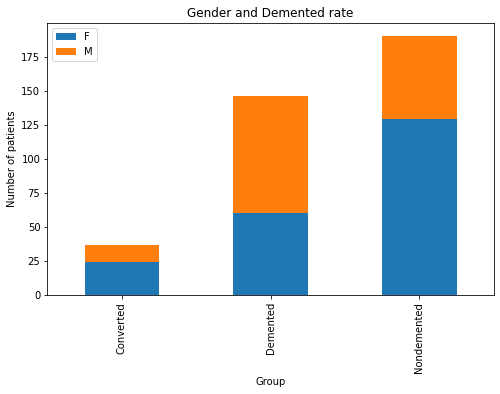

In [ ]:
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')
plt.show();

groupÏóêÎäî convertedÍ∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ï†ïÌôïÌûà ÏπòÎß§ ÌôòÏûê Ïùò ÏàòÎ•º ÌååÏïÖÌïòÍ∏∞ ÌûòÎì§Îã§. <br>Îî∞ÎùºÏÑú groupÎ≥ÄÏàòÏôÄ Îã§Î•∏ Î≥ÄÏàòÎì§Ïùò Í¥ÄÍ≥ÑÎ•º ÌååÏïÖÌïòÍ∏∞ Î≥¥Îã§ CDRÏùÑ ÏßÅÏ†ëÏ†ÅÏúºÎ°ú ÌôúÏö©Ìï¥ÏÑú 
<br>ÌôòÏûê ÏàòÎ•º ÌååÏïÖÌïòÎäî Í≤ÉÏù¥ Îçî Ï†ïÌôïÌï† Í≤ÉÏù¥Îã§.

 ‚ö° **CDR ÏßÄÌëú**

- CDR = 0 : ÏπòÎß§Í∞Ä ÏïÑÎãò
- CDR = 0.5 : ÏπòÎß§Í∞Ä ÏùòÏã¨Ïä§Îü¨ÏõÄ, Îß§Ïö∞ Í≤ΩÎèÑÏùò ÏπòÎß§
- CDR = 1 : Í≤ΩÎèÑ ÏπòÎß§
- CDR = 2 : Ï§ëÏ¶ùÎèÑÏùò ÏπòÎß§


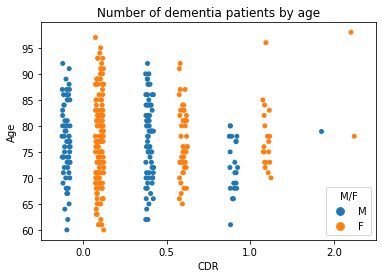

In [ ]:
# ÏÑ±Î≥ÑÍ≥º ÎÇòÏù¥Ïóê Îî∞Î•∏ CDR Î∂ÑÌè¨
sns.stripplot(x=df['CDR'], y=df['Age'], hue=df['M/F'], jitter=True, dodge=True)
plt.title('Number of dementia patients by age')
plt.show();

**_[ÏÑ±Î≥ÑÍ≥º ÎÇòÏù¥Ïóê Îî∞Î•∏ ÏπòÎß§ ÏàòÏ§Ä ]_**

- ÏπòÎß§Îäî ÎåÄÎ∂ÄÎ∂Ñ 70-80ÏÑ∏ ÏÇ¨Ïù¥ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ Í¥ÄÏ∞∞ ÎêúÎã§.
- Ïó¨ÏÑ±Îì§Î≥¥Îã§ ÎÇ®ÏÑ±Îì§Ïù¥ ÏπòÎß§Ïóê Í±∏Î¶¥ Í∞ÄÎä•ÏÑ±Ïù¥ Îçî ÎÜíÎã§.
- Ïó¨ÏÑ±Îì§Î≥¥Îã§ ÎÇ®ÏÑ±Îì§ÏùÄ Ïù¥Î•∏ ÎÇòÏù¥Ïóê ÏπòÎß§Í∞Ä Î∞úÎ≥ëÌïòÎäî ÏñëÏÉÅÏùÑ Î≥¥Ïù∏Îã§.

In [ ]:
# ÏãúÍ∞ÅÌôî Ìï®Ïàò ÏÉùÏÑ±
# CDRÏóê Îî∞Î•∏ Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî Ìï®Ïàò
def strip_plot(feature):
    plot = sns.stripplot(x=df['CDR'], y=df[feature])

In [ ]:
def strip_plot_sex(feature):
    plot = sns.stripplot(x=df['CDR'], y=df[feature], hue=df['M/F'], jitter=True, dodge=True)

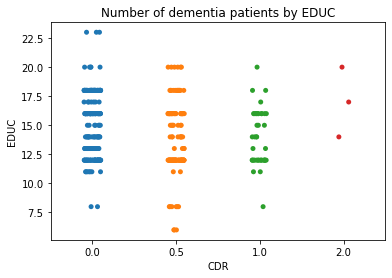

In [ ]:
strip_plot('EDUC')
plt.title('Number of dementia patients by EDUC')
plt.show();

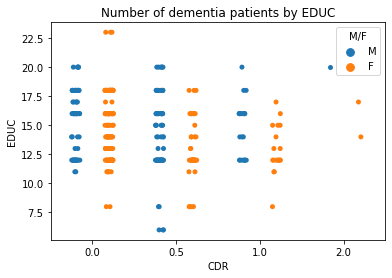

In [ ]:
strip_plot_sex('EDUC')
plt.title('Number of dementia patients by EDUC')
plt.show();

In [ ]:
import plotly.express as px

In [ ]:
def plotly_scatter(continue_types):
    fig = px.scatter(df, x = df['CDR'], y = df[continue_types], color = df['M/F'], 
                     color_continuous_scale = px.colors.qualitative.Dark2, title= 'Correlation with CDR')
    fig.show();

In [ ]:
def plotly_box(continue_types):
    fig = px.box(df, y = df[continue_types], color = df['CDR'], 
                     color_discrete_sequence = px.colors.qualitative.Dark2, title= 'Correlation with CDR')
    fig.show();

In [ ]:
plotly_scatter('EDUC')

In [ ]:
plotly_box('EDUC')

**_[ÍµêÏú°ÏàòÏ§ÄÏóê Îî∞Î•∏ ÏπòÎß§ ÏàòÏ§Ä ]_**

- Î≥¥ÌÜµ 12ÎÖÑ ~ 16ÎÖÑÏùò ÍµêÏú° ÏàòÏ§ÄÏùÑ Í∞ÄÏßÑ ÏÇ¨ÎûåÎì§Ïùò Î∞úÎ≥ë ÌôïÎ•†Ïù¥ ÎÜíÎã§
- Ïó¨ÏÑ±Ïóê ÎπÑÌï¥ ÎÇ®ÏÑ±Ïùò Î∞úÎ™Ö Ïó∞Î†πÏùÄ Í¥ëÎ≤îÏúÑÌï®Í≥º ÎèôÏãúÏóê ÍµêÏú° ÏàòÏ§ÄÏù¥ ÎÜíÏùÄ ÏÇ¨ÎûåÎì§ÏóêÍ≤åÏÑú <br> 
Î∞úÎ≥ë ÌôïÎ•†Ïù¥ ÎÜíÏùÄ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
- `CDR = 2` Ïóê Ìï¥ÎãπÌïòÎäî ÌôòÏûêÎì§Ïùò ÍµêÏú° ÏàòÏ§ÄÏùÄ ÏµúÏÜå 14Î°ú ÎÜíÏùÄ Ìé∏Ïóê Ìï¥ÎãπÌïúÎã§.
<br> ÏúÑ Î∂ÑÏÑùÏóê Îî∞Î•¥Î©¥ ÍµêÏú° ÏàòÏ§ÄÍ≥º ÏπòÎß§ Î∞úÎ≥ë Ïó¨Î∂Ä, Í∑∏ ÏàòÏ§ÄÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§Í≥† Î¥êÎèÑ Î¨¥Î∞©ÌïòÎã§.



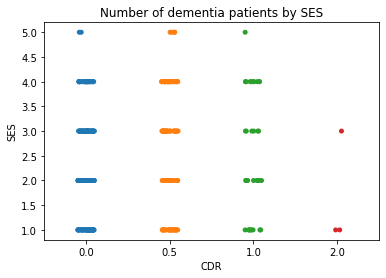

In [ ]:
strip_plot('SES')
plt.title('Number of dementia patients by SES')
plt.show();

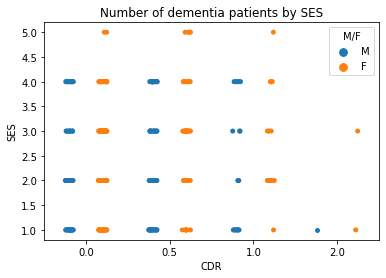

In [ ]:
strip_plot_sex('SES')
plt.title('Number of dementia patients by SES')
plt.show();

In [ ]:
plotly_scatter('SES')

In [ ]:
plotly_box('SES')

**_[ÏÇ¨ÌöåÍ≤ΩÏ†úÏ†ÅÏßÄÏúÑÏóê Îî∞Î•∏ ÏπòÎß§ ÏàòÏ§Ä ]_**

- `CDR = 2`Ïù∏ Ï§ëÏ¶ù ÏπòÎß§ ÌôòÏûêÎì§Ïùò ÏÇ¨ÌöåÍ≤ΩÏ†úÏ†Å ÏßÄÏúÑ ÏàòÏ§ÄÏùÄ ÎÇÆÏùÄ Ìé∏Ïù¥Îã§.
- ÏπòÎß§Í∞Ä ÏïÑÎãå Í≤ÄÏÇ¨ÏûêÎì§Í≥º ÏùòÏã¨, Í≤ΩÏ¶ù Ï†ïÎèÑÏùò ÌôòÏûêÎì§Ïùò ÏÇ¨ÌöåÍ≤ΩÏ†úÏ†Å ÏßÄÏúÑ ÏàòÏ§ÄÏù¥ ÎπÑÏä∑ÌïòÎã§.
- Îî∞ÎùºÏÑú ÏÇ¨ÌöåÍ≤ΩÏ†úÏ†Å ÏßÄÏúÑ Ïó≠Ïãú ÏπòÎß§ Î∞úÎ≥ë Ïó¨Î∂ÄÏôÄ Í∑∏ ÏàòÏ§ÄÍ≥ºÎäî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§Í≥† ÌåêÎã®ÌïúÎã§.

 ‚ö° **MMSE ÏßÄÌëú**

- 27-30Ï†ê: Ï†ïÏÉÅ = `CDR: 0`
- 26-27Ï†ê: Í≤ΩÎèÑ Ïù∏ÏßÄ Ïû•Ïï† = `CDR: 0` ÎòêÎäî `CDR: 0.5`
- 23-24Ï†ê: Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ ÌïÑÏöî = `CDR: 0` ÎòêÎäî`CDR: 0.5`
- 20-23Ï†ê: Í≤ΩÏ¶ù = `CDR: 1`
- 10-19Ï†ê: Ï§ëÏ¶ùÎèÑ = `CDR: 2`

<br>

üîñ **CDR ÏßÄÌëúÏôÄ MMSE Ï†êÏàò Í¥ÄÍ≥Ñ Ï†ïÎ¶¨**

- 24Ï†ê Ïù¥ÏÉÅÏùºÎïå Ï†ïÏÉÅÏúºÎ°ú Ï¶â, NormalÎ°ú ÌåêÎã®ÌïúÎã§. `CDR = 0`, `CDR = 0.5`
- 20 - 23Ï†ê Ïùº ÎïåÎäî Í≤ΩÎèÑ Ï¶â, Mild ÏπòÎß§ÎùºÍ≥† ÌåêÎã®ÌïúÎã§. `CDR = 1`
- 10 - 19Ï†ê Ïù¥ÌïòÏùº ÎïåÎäî ÌôïÏ†ïÏ†Å Ï§ëÏ¶ùÎèÑ Ï¶â, Moderate ÏπòÎß§ÎùºÍ≥† ÌåêÎã®ÌïúÎã§. `CDR = 2`

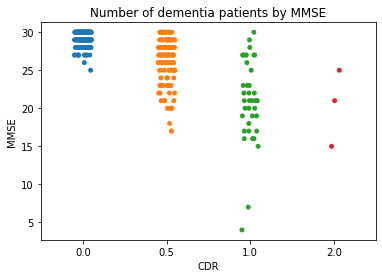

In [ ]:
strip_plot('MMSE')
plt.title('Number of dementia patients by MMSE')
plt.show();

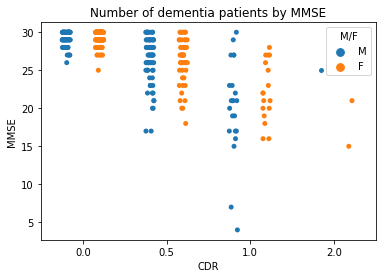

In [ ]:
strip_plot_sex('MMSE')
plt.title('Number of dementia patients by MMSE')
plt.show();

In [ ]:
plotly_scatter('MMSE')

In [ ]:
plotly_box('MMSE')

In [ ]:
# ÍµêÏú° Í∏∞Í∞ÑÍ≥º Í∞ÑÏù¥Ï†ïÏã†Í≤ÄÏÇ¨ Ï†êÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
#ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
#ÍµêÏú° Í∏∞Í∞ÑÏù¥ Í∏∏ÏàòÎ°ù Ï†êÏàòÍ∞Ä ÎÜíÏïÑÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùå
#ÏòàÏô∏Ï†ÅÏù∏ Í≤ÄÏÇ¨ÏûêÍ∞Ä Î∞úÏÉù
#ÏπòÎß§Î°ú ÏßÑÎã®Îêú ÌôòÏûêÍ∞Ä Ï†êÏàòÍ∞Ä ÎÜíÏùÄ Í≤ΩÏö∞ or  Í∑∏ Î∞òÎåÄ
fig = px.scatter(df, x = df['EDUC'], y = df['MMSE'], color = df['M/F'], trendline="ols", title='Correlation between EDUC and MMSE')
fig.show();

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



**_[Í∞ÑÏù¥Ï†ïÏã†Í≤ÄÏÇ¨Ïóê Îî∞Î•∏ ÏπòÎß§ ÏàòÏ§Ä ]_**

- ÏπòÎß§ Ïó¨Î∂ÄÏôÄ Í∑∏ ÏàòÏ§ÄÏù¥ ÎÜíÏïÑÏßàÏàòÎ°ù Ï†êÏàòÍ∞Ä ÎÇÆÏùÄ Ï™ΩÏóê ÌòïÏÑ±ÎêòÏñ¥ÏûàÏùå
- Ï†ïÏÉÅÏù¥Í±∞ÎÇò ÏπòÎß§ ÏùòÏã¨, Í≤ΩÎèÑÏù∏ÏßÄÏû•Ïï† ÎòêÎäî Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ ÌïÑÏöîÏóê Ìï¥ÎãπÌïòÎäî Í≤ÄÏÇ¨Ïûê Ï§ë  <br>MMSE Ï†êÏàòÍ∞Ä Îñ®Ïñ¥ÏßÄÎäî Í≤ΩÏö∞Í∞Ä ÏûàÎäîÎç∞, Ïù¥Îäî Ïó¨Îü¨ ÏöîÏù∏Ïù¥ ÏûëÏö©Ìï¥ÏÑú Î∞úÏÉùÌïú Í≤ÉÏúºÎ°ú ÌåêÎã®ÌïúÎã§.

ex. Ïó∞Î†π, ÍµêÏú° Í∏∞Í∞Ñ Îì±ÏùÑ Ìè¨Ìï®Ìïú Í≤ÄÏÇ¨ÏûêÎì§Ïùò `ÎÇ¥Î∂ÄÏ†Å ÏöîÏù∏`ÏúºÎ°ú Ïù∏Ìïú Ï∞®Ïù¥
<br> ex. Ïö∞Ïö∏Ï¶ùÏúºÎ°ú Ïù∏Ìïú ÏùºÏãúÏ†ÅÏù∏ Ïù∏ÏßÄ Ïû•Ïï† Îì±Ïù∏ `Ïô∏Î∂ÄÏ†Å ÏöîÏù∏`ÏúºÎ°ú Ïù∏Ìïú Ï∞®Ïù¥




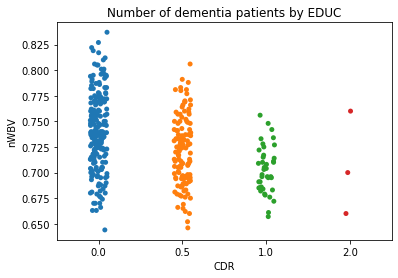

In [ ]:
strip_plot('nWBV')
plt.title('Number of dementia patients by EDUC')
plt.show();

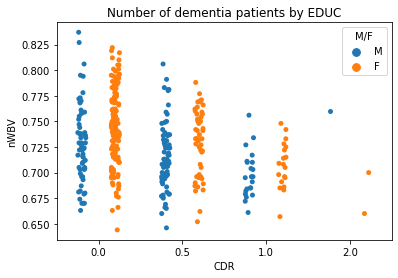

In [ ]:
strip_plot_sex('nWBV')
plt.title('Number of dementia patients by EDUC')
plt.show();

In [ ]:
plotly_scatter('nWBV')

In [ ]:
plotly_box('nWBV')

In [ ]:
fig = px.scatter(df, x = df['nWBV'], y = df['Age'], color = df['M/F'], trendline="ols", title='Correlation between nWBV and Age')
fig.show();

**_[Ï†ïÍ∑úÌôîÎêú Ï†ÑÏ≤¥ Îáå Î∂ÄÌîºÏóê Îî∞Î•∏ ÏπòÎß§ ÏàòÏ§Ä ]_**

- Îáå Î∂ÄÌîºÍ∞Ä ÏûëÏùÑÏàòÎ°ù ÏπòÎß§ Î∞úÎ≥ë ÌôïÎ•†Ïù¥ ÎÜíÎã§.
- Îáå Î∂ÄÌîºÎäî ÎÇòÏù¥ÏôÄ ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎã§.
<br> = ÎÇòÏù¥Í∞Ä ÎßéÏùÑÏàòÎ°ù Îáå Î∂ÄÌîºÎäî Ï§ÑÏñ¥Îì†Îã§.
- ÏòàÏô∏Ï†ÅÏù∏ Í≤ÄÏÇ¨ÏûêÎì§ÏùÄ `ÎÇ¥Î∂ÄÏ†Å ÏöîÏù∏ (ex.ÎÇòÏù¥)`Î°ú Ïù∏Ìï¥ ÎÇòÌÉÄÎÇ¨ÏùÑ ÌôïÎ•†Ïù¥ ÏûàÎã§.

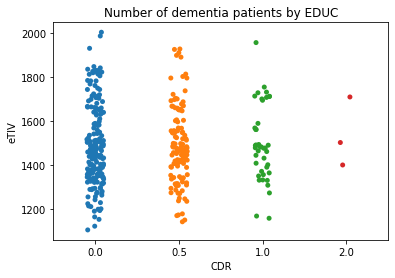

In [ ]:
strip_plot('eTIV')
plt.title('Number of dementia patients by EDUC')
plt.show();

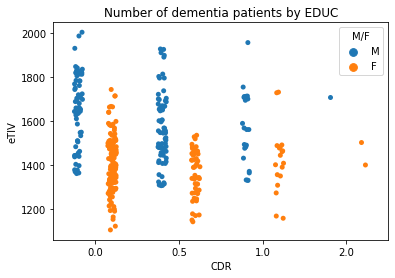

In [ ]:
strip_plot_sex('eTIV')
plt.title('Number of dementia patients by EDUC')
plt.show();

In [ ]:
plotly_scatter('eTIV')

In [ ]:
plotly_box('eTIV')

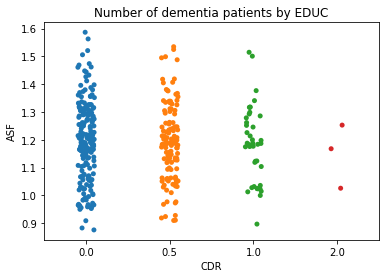

In [ ]:
strip_plot('ASF')
plt.title('Number of dementia patients by EDUC')
plt.show();

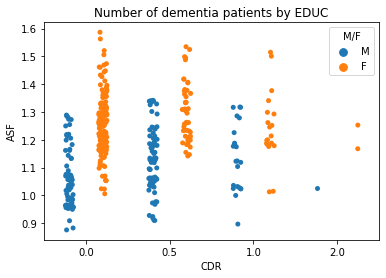

In [ ]:
strip_plot_sex('ASF')
plt.title('Number of dementia patients by EDUC')
plt.show();

In [ ]:
plotly_scatter('ASF')

In [ ]:
plotly_box('ASF')

In [ ]:
fig = px.scatter(df, x = df['ASF'], y = df['eTIV'], color = df['M/F'], trendline="ols", title='Correlation between ASF and eTIV')
fig.show();

**ASF** = Ïù∏Ï≤¥ Ìï¥Î∂ÄÌïôÏ†Å Ï∞®Ïù¥Î•º Í∏∞Î∞òÏúºÎ°ú Ï∂îÏ†ïÎêú Ï¥ù ÎëêÍ∞úÎÇ¥ Ïö©Ï†Å(eTIV)ÏùÑ ÎπÑÍµêÌï† Ïàò ÏûàÎäî Ïä§ÏºÄÏùºÎßÅ Ïù∏Ïûê

**_[eTIV, ASFÏóê Îî∞Î•∏ ÏπòÎß§ ÏàòÏ§Ä ]_**

- eTIVÏôÄ ASFÎäî ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑÎã§.
<br>ÎëêÍ∞ú ÎÇ¥ Ïö©Ï†ÅÏù¥ ÏûëÏùÑÏàòÎ°ù Ïä§ÏºÄÏùºÎßÅ Ïù∏ÏûêÍ∞Ä ÌÅ¨Îã§.
- ÎëêÍ∞ú ÎÇ¥ Ïö©Ï†ÅÏùÄ Ïó¨ÏûêÎ≥¥Îã§ ÎÇ®ÏûêÍ∞Ä ÌÅ∞ ÏàòÏπòÎ•º Î≥¥Ïù¥ÎäîÎç∞ Ïù¥Îäî ÏÉùÎ¨ºÌïôÏ†Å Ï∞®Ïù¥Î°ú ÌåêÎã®ÌïúÎã§.
- ÏúÑ Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÌôïÏù∏ÌñàÏùÑ ÎñÑ, ÎëêÍ∞ú ÎÇ¥ Ïö©Ï†ÅÏùÄ ÏπòÎß§ Î∞úÎ≥ë Ïó¨Î∂Ä, Í∑∏ ÏàòÏ§ÄÍ≥º Í¥ÄÎ†®Ïù¥ ÏóÜÎã§.

## 3. Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df['CDR'].replace(to_replace=0.0, value='A', inplace=True)
df['CDR'].replace(to_replace=0.5, value='B', inplace=True)
df['CDR'].replace(to_replace=1.0, value='C', inplace=True)
df['CDR'].replace(to_replace=2.0, value='D', inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
for x in df.columns:
    f = LabelEncoder()
    df[x] = f.fit_transform(df[x])

In [ ]:
train, test = train_test_split(df, test_size=0.3)

In [ ]:
x_train = train[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y_train = train.CDR
x_test = test[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y_test = test.CDR

In [ ]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train = scaler.transform(x_train)

# Scale the test set
x_test = scaler.transform(x_test)

In [ ]:
y_train=np.ravel(y_train)
x_train=np.asarray(x_train)

y_test=np.ravel(y_test)
x_test=np.asarray(x_test)

In [ ]:
#Metrics
def evaluation(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, AUC: {3:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### Decision Tree Model


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=12)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy of Decision Tree: {0:.4f}'.format(accuracy))

Accuracy of Decision Tree: 0.6339


### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy of Random Forest: {0:.4f}'.format(accuracy))

Accuracy of Random Forest: 0.7679


### Gradient Boosting Machine


In [ ]:
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(x_train, y_train)
pred = gb_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy of Gradient Boosting Machine: {0:.4f}'.format(accuracy))

Accuracy of Gradient Boosting Machine: 0.7768


### LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(x_test, y_test)]
lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='logloss',
                 eval_set=evals, verbose=False)
preds = lgbm_wrapper.predict(x_test)
pred_proba = lgbm_wrapper.predict_proba(x_test)[:,1]

accuracy = accuracy_score(y_test, preds)
print('Accuracy of LGBM: {0:.4f}'.format(accuracy))

Accuracy of LGBM: 0.7679
